In [1]:
from copy import copy, deepcopy

import numpy as np
import matplotlib.pyplot as plt

## Задание 2 ##

Посчитайте производную $f(x)=x^x$ в точке $x_0 = e$

Ответ округлите до одного знака после запятой.

*Указание*. Представьте функцию $f(x)$ как $e^{g(x)}$ для некоторой $g$.

## Задание 4 ##

​Ваше задание --- написать python-функцию, которая в качестве аргумента принимает:

числовую функцию $f$, у которой необходимо вычислить производную
число $\varepsilon$ --- его необходимо использовать в качестве "малого шага" для приближённого вычисления производной.
Функция должна в свою очередь возвращать числовую функцию $f'$, равную производной функции $f$.

Однако не подумайте, что вас просят написать что-то, что будет вычислять эту самую производную аналитически. Производную следует вычислять по формуле $$f'(x)\approx \frac{f(x+\varepsilon) - f(x)}{\varepsilon}.$$
​

In [2]:
def numerical_derivative_1d(func, epsilon):
    """
    Функция для приближённого вычисления производной функции одной переменной. 
    :param func: float -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по оси Ох
    :return: другая функция, которая приближённо вычисляет производную в точке
    """
    def deriv_func(x):
        """
        :param x: float — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        return (func(x+epsilon) - func(x))/epsilon
    return deriv_func

In [3]:
# Проверьте себя!
def polynom_to_prime(x):
    return 20 * x**5 + x**3 - 5 * x**2 + 2 * x + 2.0


def primed_poly(x):
    return 100 * x**4 + 3 * x**2 -10 * x + 2.0


approx_deriv = numerical_derivative_1d(polynom_to_prime, 1e-5)

grid = np.linspace(-2, 2, 100)
right_flag = True
tol = 0.05
debug_print = []

for x in grid:
    estimation_error = abs(primed_poly(x) - approx_deriv(x))
    if estimation_error > tol:
        debug_print.append((estimation_error, primed_poly(x), approx_deriv(x)))
        right_flag = False

if not right_flag:
    print("Что-то не то...")
    print(debug_print)
    plt.plot(grid, primed_poly(grid), label="Истинная производная")
    plt.plot(grid, approx_deriv(grid), label="Численное приближение")
    plt.legend()

print(str(right_flag))

True


## Задание 5 ##

В этом задании Вы должны найти минимум функций с помощью градиентного спуска.

Вам на вход подаются функция `func`, ее производная `deriv` (*), а также начальная точка `start`, на выходе - точка локального минимума. Для вашего удобства мы написали функцию для отрисовки траектории градиентного спуска

(*) - вам не нужно будет ее вычислять. То, что вы написали в предыдущем задании, вам пригодится чуть позже.

В первой реализации градиентного спуска можете предполагать, что на вход подаются функции с единственным, глобальным минимумом. Перед тем, как писать код, ответьте себе на следующие вопросы:

* Как понять, что пора остановиться? Это может зависеть от градиента или расстояния между двумя соседними шагами алгоритма, так и от числа уже выполненных итераций.
* Как правильно менять величину шага (`learning rate`) от итерации к итерации?

В этом пункте гарантируется, что существует решение, использующее обычный градиентный спуск с фиксированным learning rate и наперёд заданным количеством итераций.

На каждой итерации вызывайте `callback(x, f(x))`, где `x` это результат шага градиентного спуска.   
Это нужно для отрисовки шагов алгоритма.

In [4]:
def grad_descent_v1(func, deriv, start=None, callback=None):
    """ 
    Реализация градиентного спуска для функций с одним локальным минимумом,
    совпадающим с глобальным. Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param start: float — начальная точка
    """
    if start is None:
        # Если точка не дана, сгенерируем случайную
        # из стандартного нормального распределения.
        # При таком подходе начальная точка может быть
        # любой, а не только из какого-то ограниченного диапазона
        np.random.seed(179)
        start = np.random.randn()

    estimate = start
    callback(estimate, func(estimate))  # не забывайте логировать шаги!
    for i in range(1000):
        estimate = estimate - 0.1*deriv(estimate)
        callback(estimate, func(estimate))

    return estimate

### Отрисовка и тесты
Рекомедуем пользоваться!

In [5]:
def plot_convergence_1d(func, x_steps, y_steps, ax, grid=None, title=""):
    """
    Функция отрисовки шагов градиентного спуска.
    Не меняйте её код без необходимости!
    :param func: функция, которая минимизируется градиентным спуском
    :param x_steps: np.array(float) — шаги алгоритма по оси Ox
    :param y_steps: np.array(float) — шаги алгоритма по оси Оу
    :param ax: холст для отрисовки графика
    :param grid: np.array(float) — точки отрисовки функции func
    :param title: str — заголовок графика
    """
    ax.set_title(title, fontsize=16, fontweight="bold")

    if grid is None:
        grid = np.linspace(np.min(x_steps), np.max(x_steps), 100)

    fgrid = [func(item) for item in grid]
    ax.plot(grid, fgrid)
    yrange = np.max(fgrid) - np.min(fgrid)

    arrow_kwargs = dict(linestyle="--", color="grey", alpha=0.4)
    for i, _ in enumerate(x_steps):
        if i + 1 < len(x_steps):
            ax.arrow(
                x_steps[i], y_steps[i],
                x_steps[i + 1] - x_steps[i],
                y_steps[i + 1] - y_steps[i],
                **arrow_kwargs
            )

    n = len(x_steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(x_steps, y_steps, c=color_list)
    ax.scatter(x_steps[-1], y_steps[-1], c="red")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")


class LoggingCallback:
    """
    Класс для логирования шагов градиентного спуска.
    Сохраняет точку (x, f(x)) на каждом шаге.
    Пример использования в коде: callback(x, f(x))
    """
    def __init__(self):
        self.x_steps = []
        self.y_steps = []

    def __call__(self, x, y):
        self.x_steps.append(x)
        self.y_steps.append(y)


def test_convergence_1d(grad_descent, test_cases, tol=1e-2, axes=None, grid=None):
    """
    Функция для проверки корректности вашего решения в одномерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция (обязательно)
        - "deriv" — её производная (обязательно)
        - "start" — начальная точка start (м.б. None) (опционально)
        - "low", "high" — диапазон для выбора начальной точки (опционально)
        - "answer" — ответ (обязательно)
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :param grid: np.array(float), точки на оси Ох для отрисовки тестов
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent(**test_input, callback=callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            x_steps = np.array(callback.x_steps)
            y_steps = np.array(callback.y_steps)
            plot_convergence_1d(
                test_input["func"], x_steps, y_steps,
                ax, grid, key
            )
            ax.axvline(answer, 0, linestyle="--", c="red",
                        label=f"true answer = {answer}")
            ax.axvline(x_steps[-1], 0, linestyle="--", c="xkcd:tangerine",
                        label=f"estimate = {np.round(x_steps[-1], 3)}")
            ax.legend(fontsize=16)
        # Проверяем, что найдення точка достаточно близко к истинной
        if abs(answer - res_point) > tol or np.isnan(res_point):
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log

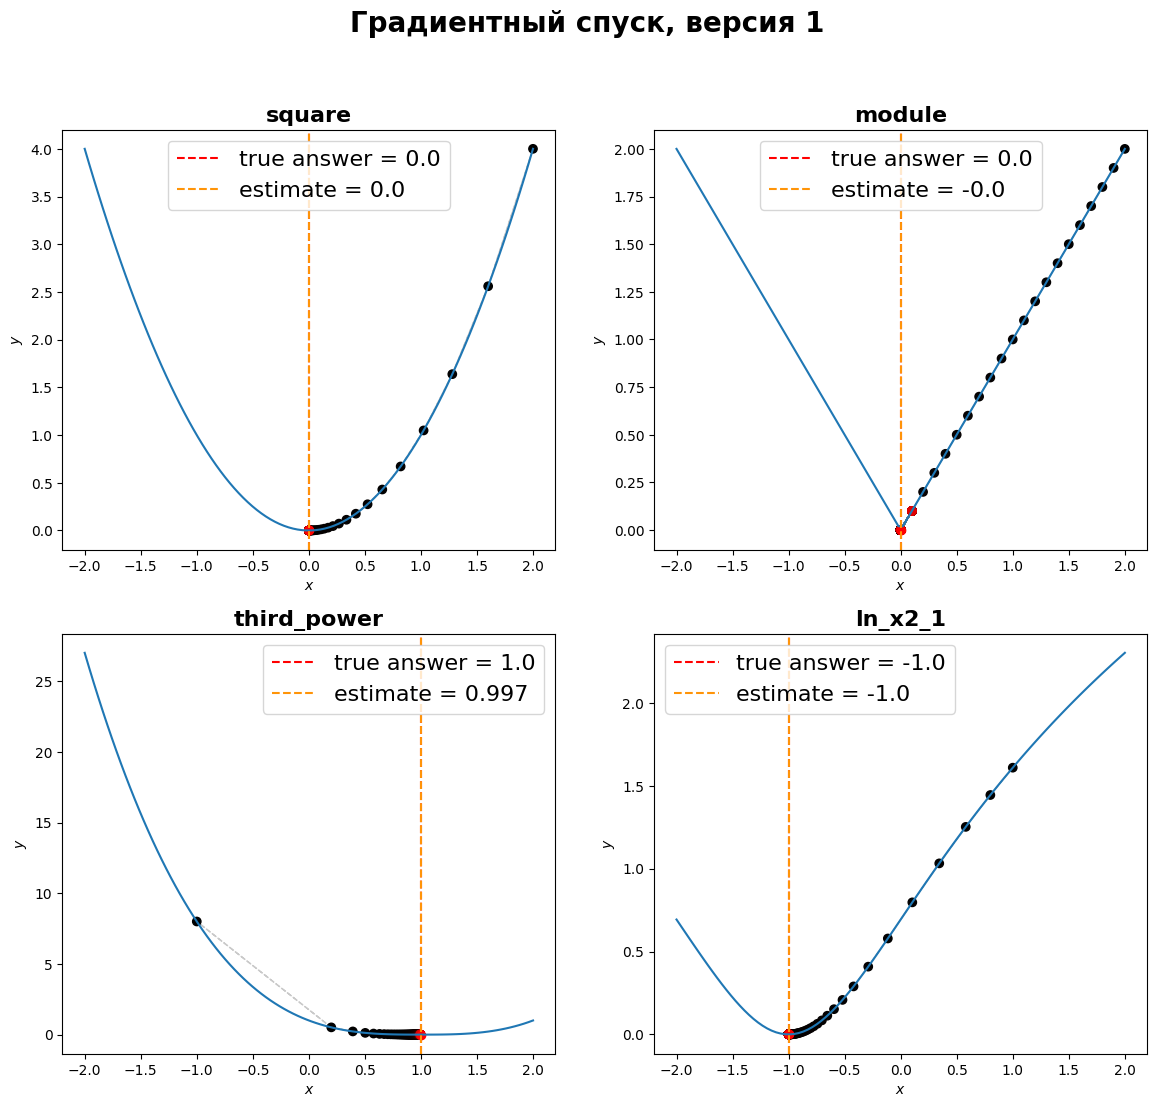

In [6]:
test_cases = {
    "square": {
        "func" : lambda x: x * x,
        "deriv" : lambda x: 2 * x,
        "start" : 2,
        "answer" : 0.0
    },
    "module": {
        "func" : lambda x: abs(x),
        "deriv" : lambda x: 1 if x > 0 else -1,
        "start" : 2,
        "answer" : 0.0
    },
    "third_power": {
        "func" : lambda x: abs((x - 1)**3),
        "deriv" : lambda x: 3 * (x - 1)**2 * np.sign(x-1),
        "start" : -1,
        "answer" : 1.0
    },
    "ln_x2_1": {
        "func" : lambda x: np.log((x + 1)**2 + 1),
        "deriv" : lambda x: 2 * (x + 1) / (x**2 +1),
        "start" : 1,
        "answer" : -1.0
    }
}

tol = 1e-2  # желаемая точность
fig, axes = plt.subplots(2,2, figsize=(14, 12))
fig.suptitle("Градиентный спуск, версия 1", fontweight="bold", fontsize=20)
grid = np.linspace(-2, 2, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v1, test_cases, tol,
    axes, grid
)
if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

## Задание 6 ##

Это задание чуть сложнее. Если раньше Вам нужно было просто найти минимум у довольно хорошей функции, то сейчас в тестах будут плохие. У них может быть несколько локальных минимумов, вам же нужно найти глобальный минимум у каждой функции.

В общем случае такая задача невыполнима, но у вас будут одномерные функции и все самое интересное будет сосредоточено в районе нуля. А именно, известно что глобальный минимум лежит в пределах (`low`, `high`) (параметры алгоритма). Вам нужно модифицировать градиентный спуск, который вы написали в предыдущем задании, чтобы он работал и в таком случае.

Сначала запустите градиентный спуск из прошлого пункта на тестах из ноутбука. Скорее всего, некоторые из них не пройдут. Подумайте, как исправить ситуацию.

И снова не забывайте вызывать `callback(x, f(x))` на каждом шаге алгоритма!

**Подсказка**. Попробуйте запускать градиентный спуск, реализованный в предыдущем пункте, со случайными стартовыми точками на данном отрезке, а затем из найденных результатов выбирать минимальный. В этой задаче в функциях могут после первого же шага градиентного спуска появляться очень большие значения. Советуем отбрасывать стартовые точки, которые привели к такому результату.

Больше о тонкостях градиентного спуска можно прочитать, например, в <a href=https://github.com/amkatrutsa/optimization-fivt/blob/master/07-GD/lecture7.pdf>лекциях МФТИ</a>.


In [7]:
def grad_descent_v2(func, deriv, low=None, high=None, callback=None):
    """ 
    Реализация градиентного спуска для функций с несколькими локальным минимумами,
    но с известной окрестностью глобального минимума. 
    Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param low: float — левая граница окрестности
    :param high: float — правая граница окрестности
    """
    best_estimate = high;
    for j in np.linspace(low, high, 20):
        start = j
        callback(start, func(start))
        estimate = start
        for _ in range(1000):
            estimate = estimate - 0.01*deriv(estimate)
            callback(estimate, func(estimate))
    return best_estimate

/var/folders/m4/qlrlw2m95xgccb5_jxs2qtq40000gn/T/ipykernel_3710/4237592076.py:23: RuntimeWarning: overflow encountered in scalar power
  "func" : lambda x: x**20 + x**2 - 20 * x + 10  ,
/var/folders/m4/qlrlw2m95xgccb5_jxs2qtq40000gn/T/ipykernel_3710/4237592076.py:24: RuntimeWarning: overflow encountered in scalar power
  "deriv" : lambda x: 20 * x**19 + 2 * x - 20,
/var/folders/m4/qlrlw2m95xgccb5_jxs2qtq40000gn/T/ipykernel_3710/4237592076.py:23: RuntimeWarning: invalid value encountered in scalar subtract
  "func" : lambda x: x**20 + x**2 - 20 * x + 10  ,
/var/folders/m4/qlrlw2m95xgccb5_jxs2qtq40000gn/T/ipykernel_3710/1325374849.py:17: RuntimeWarning: invalid value encountered in scalar subtract
  estimate = estimate - 0.01*deriv(estimate)
/Users/timmiakov/Code/hse-ml-course/venv/lib/python3.9/site-packages/matplotlib/patches.py:1544: RuntimeWarning: invalid value encountered in scalar divide
  sx = self._dy / distance
/Users/timmiakov/Code/hse-ml-course/venv/lib/python3.9/site-package

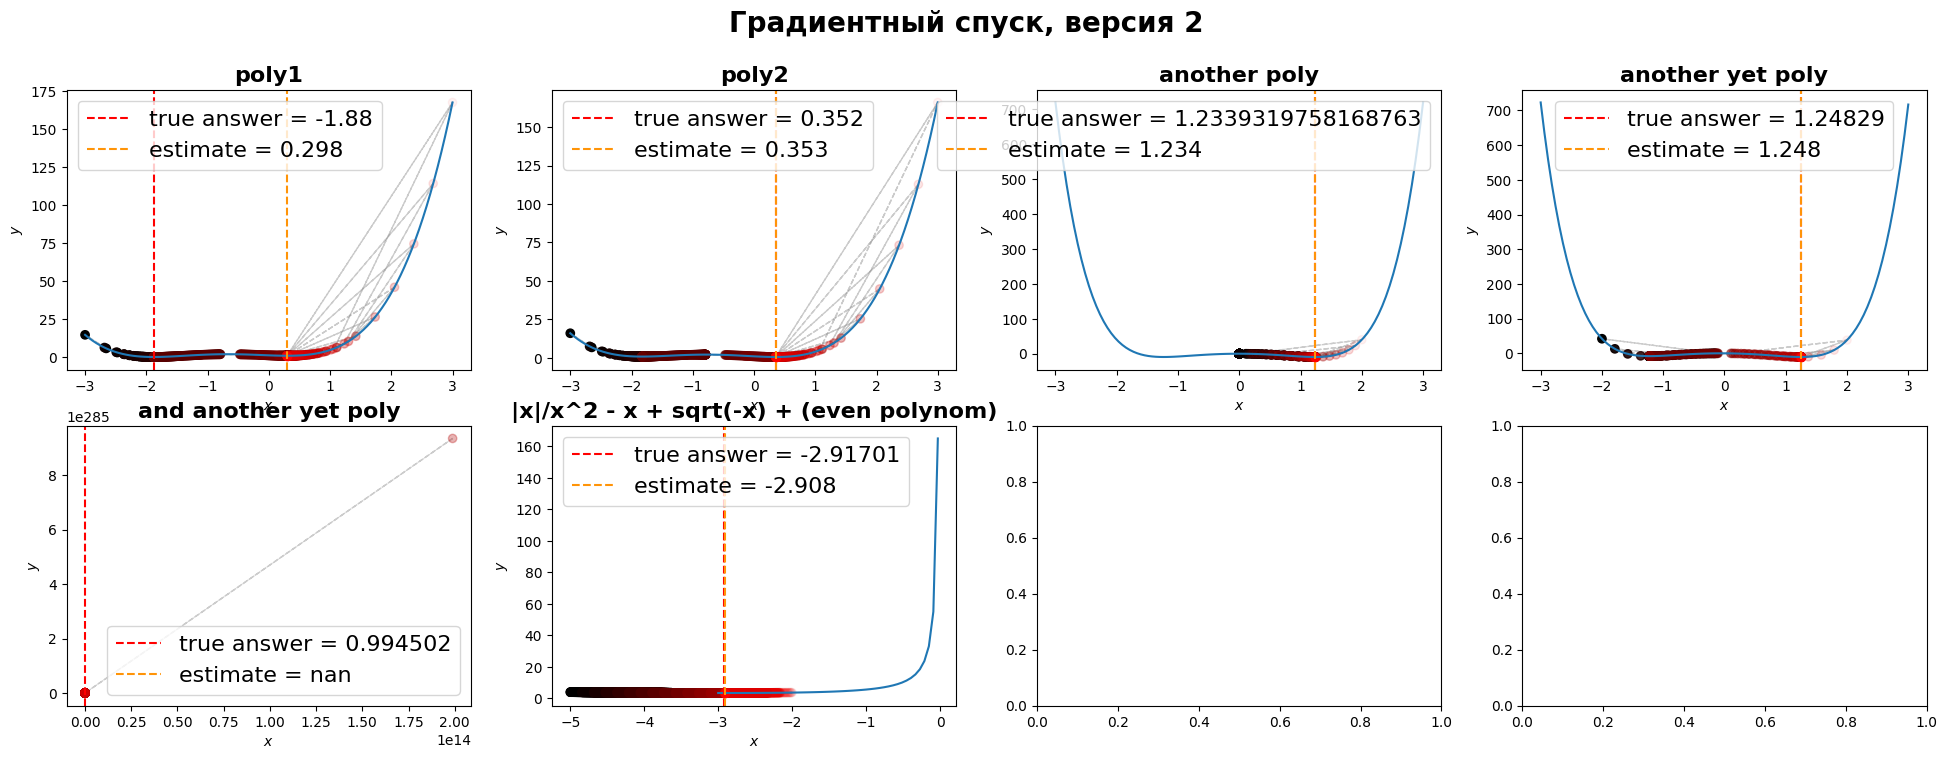

In [8]:
test_cases = {
    "poly1" : {
        "func" : lambda x: x**4 + 3 * x**3 + x**2 - 1.5 * x + 1,
        "deriv" : lambda x: 4 * x**3 + 9 * x**2 + 2 * x - 1.5,
        "low" : -3, "high" : 3, "answer" : -1.88
    },
    "poly2" : {
        "func" : lambda x: x**4 + 3 * x**3 + x**2 - 2 * x + 1.0,
        "deriv" : lambda x: 4 * x**3 + 9 * x**2 + 2 * x - 2.0,
        "low" : -3, "high" : 3, "answer" : 0.352
    },
    "another poly" : {
        "func" : lambda x: x**6 + x**4 - 10 * x**2 ,
        "deriv" : lambda x: 6 * x**5 + 4 * x**3 - 20 * x,
        "low" : 0, "high" : 2, "answer" : 1/3 * np.sqrt((np.sqrt(31) - 1) * 3)
    },
    "another yet poly" : {
        "func" : lambda x: x**6 + x**4 - 10 * x**2 - x ,
        "deriv" : lambda x: 6 * x**5 + 4 * x**3 - 20 * x - 1,
        "low" : -2, "high" : 2, "answer" : 1.24829
    },
    "and another yet poly" : {
        "func" : lambda x: x**20 + x**2 - 20 * x + 10  ,
        "deriv" : lambda x: 20 * x**19 + 2 * x - 20,
        "low" : -1, "high" : 2, "answer" : 0.994502
    },
    "|x|/x^2 - x + sqrt(-x) + (even polynom)" : {
        "func" : lambda x: 5 * np.abs(x)/x**2 - 0.5 * x + 0.1 * np.sqrt(-x) + 0.01 * x**2 ,
        "deriv" : lambda x: -0.5 - 0.05/np.sqrt(-x) + 0.02 * x + 5/(x * np.abs(x)) - (10 * np.abs(x))/x**3,
        "low" : -5, "high" : -2, "answer" : -2.91701
    },
}

tol = 1e-2 # желаемая точность

fig, axes = plt.subplots(2,4, figsize=(24, 8))
fig.suptitle("Градиентный спуск, версия 2", fontweight="bold", fontsize=20)
grid = np.linspace(-3, 3, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v2, test_cases, tol,
    axes, grid
)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

## Задание 6а

Это задание --- ещё сложнее предыдущего. Здесь собрались функции, которые весьма сложно оптимизировать. Сначала попробуйте использовать функцию, которую вы написали в предыдущем задании. Затем, если не получилось, попробуйте применить дополнительные идеи:

* подбор адаптивного learning rate
* выполнение на каждом шаге проверки, что значение функции уменьшается в новой точке

In [ ]:
def grad_descent_v2(func, deriv, low=None, high=None, callback=None):
    """ 
    Реализация градиентного спуска для функций с несколькими локальным минимумами,
    но с известной окрестностью глобального минимума. 
    Все тесты будут иметь такую природу.
    :param func: float -> float — функция 
    :param deriv: float -> float — её производная
    :param low: float — левая граница окрестности
    :param high: float — правая граница окрестности
    """
    best_estimate = high;
    for j in np.linspace(low, high, 20):
      start = j
      callback(start, func(start))
      estimate = start
      for i in range(1000):
        estimate = estimate - 0.01 * deriv(estimate)
        callback(estimate, func(estimate))
      if (func(best_estimate) > func(estimate)): 
        best_estimate = estimate
    return best_estimate

In [ ]:
test_cases = {
    "poly3" : {
        "func" : lambda x: x**6 + 3 * x**3 + x**2 - 2 * x + 1.0,
        "deriv" : lambda x: 6 * x**5 + 9 * x**2 + 2 * x - 2.0,
        "low" : -3, "high" : 3, "answer" : 0.368
    },
    "1 - exp(log^2(x)) with constants" : {
        "func" : lambda x: 1 - 3/2 * 1/x * np.exp(-(np.log(x)) ** 2 / 2 * (3/2) **2) if x > 0.2 else 0,
        "deriv" : lambda x: (3 * np.exp(-9/8 * (np.log(x))**2) * (4 + 9 * np.log(x)))/(8 * x**2) if x > 0.2 else 0,
        "low" : 0.2, "high" : 2, "answer" : 1 / np.exp(4/9)
    },
    "exp(x^2)": {
        "func" : lambda x: np.exp(2*x**2),
        "deriv" : lambda x: 4 * x *np.exp(2 * x**2),
        "low" : -1,
        "high" : 1, "answer": 0
    }
}

tol = 1e-2 # желаемая точность

fig, axes = plt.subplots(2,4, figsize=(24, 8))
fig.suptitle("Градиентный спуск, версия 2", fontweight="bold", fontsize=20)
grid = np.linspace(-3, 3, 100)

is_correct, debug_log = test_convergence_1d(
    grad_descent_v2, test_cases, tol,
    axes, grid
)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)

## Задание 7 ##

В лекции было несколько функций, чьи градиенты Вам было предложено вычислить.

Вычислите градиент следующей функции:

$\psi(x,y,z) = sin(xz) - y^2z + e^x$

Запишите ответ в виде строки "$(\psi_{x}^{'})*i + (\psi_{y}^{'})*j + (\psi_{z}^{'})*k$", где вместо $\psi_{x}^{'}, \psi_{y}^{'}, \psi_{z}^{'}$  подставьте вычисленные частные производные (компоненты градиента).

Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e".

Примеры записи формул можно увидеть в ячейках текста задания.

**Ответ:**

## Задание 8 ##

Еще один градиент, похожий на тот, что был на лекции:

$\psi(x,y,z) = ln(cos(e^{x+y})) - ln(xy)$

Запишите ответ в виде строки "$(\psi_{x}^{'})*i + (\psi_{y}^{'})*j + (\psi_{z}^{'})*k$", где вместо $\psi_{x}^{'}, \psi_{y}^{'}, \psi_{z}^{'}$  подставьте вычисленные частные производные (компоненты градиента).

Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e".

Примеры записи формул можно увидеть в ячейках текста задания.

Запишите ответ в виде строки "()*i + ()*j", где вместо ,  подставьте вычисленные производные (компоненты градиента). Можно пользоваться символами "+", "-", "*", "/", "^", "sin", "cos", ")", "(", "e", "ln", "tg"

**Ответ:**

## Задание 9 ##

А теперь все вместе!

У вас есть только функция, которую Вам отдают в качестве аргумента и вы должны найти её минимум.

Вы будете искать глобальный, у вас это должно получиться лишь потому, что тут они хорошие.

Да, и еще, теперь они не одномерные, а двумерные.

Минимум нужно искать на $\Omega = (-5, 5) \times (-5, 5)$

***Подсказка*** можете использовать следующие параметры:

* Отклонение при вычислении производной $\varepsilon = 10^{-10}$
* Критерий остановки: близость к ответу $\delta = 10^{-10}$ и кол-во итераций $10^4$
* Длина шага градиентного спуска $lr = 1$

***Ещё одна подсказка***. Если какие-либо тесты не проходят, попробуйте запускать градиентный спуск со случайными стартовыми точками, а затем из найденных результатов выбирать оптимальный.

И вновь мы предоставляем функцию отрисовки шагов для пущего удобства.

In [ ]:
def numerical_derivative_2d(func, epsilon):
    """
    Функция для приближённого вычисления градиента функции двух переменных.
    :param func: np.ndarray -> float — произвольная дифференцируемая функция
    :param epsilon: float — максимальная величина приращения по осям
    :return: другая функция, которая приближённо вычисляет градиент в точке
    """
    def grad_func(x):
        """
        :param x: np.ndarray — точка, в которой нужно вычислить производную
        :return: приближённое значение производной в этой точке
        """
        # YOUR CODE
    return grad_func


def grad_descent_2d(func, low, high, callback=None):
    """
    Реализация градиентного спуска для функций двух переменных
    с несколькими локальным минимумами, но известной квадратной окрестностью
    глобального минимума. Все тесты будут иметь такую природу.

    Обратите внимание, что здесь градиент функции не дан.
    Его нужно вычислять приближённо.

    :param func: np.ndarray -> float — функция
    :param low: левая граница интервала по каждой из осей
    :param high: правая граница интервала по каждой из осей
    """

    # YOUR CODE
    return best_estimate

In [ ]:
def plot_convergence_2d(func, steps, ax, xlim, ylim, cmap="viridis", title=""):
    """
    Функция отрисовки шагов градиентного спуска.
    Не меняйте её код без необходимости!
    :param func: функция, которая минимизируется градиентным спуском
    :param steps: np.array[N x 2] — шаги алгоритма
    :param ax: холст для отрисовки графика
    :param xlim: tuple(float), 2 — диапазон по первой оси
    :param ylim: tuple(float), 2 — диапазон по второй оси
    :param cmap: str — название палитры
    :param title: str — заголовок графика
    """

    ax.set_title(title, fontsize=20, fontweight="bold")
    # Отрисовка значений функции на фоне
    xrange = np.linspace(*xlim, 100)
    yrange = np.linspace(*ylim, 100)
    grid = np.meshgrid(xrange, yrange)
    X, Y = grid
    fvalues = func(
        np.dstack(grid).reshape(-1, 2)
    ).reshape((xrange.size, yrange.size))
    ax.pcolormesh(xrange, yrange, fvalues, cmap=cmap, alpha=0.8)
    CS = ax.contour(xrange, yrange, fvalues)
    ax.clabel(CS, CS.levels, inline=True)
    # Отрисовка шагов алгоритма в виде стрелочек
    arrow_kwargs = dict(linestyle="--", color="black", alpha=0.8)
    for i, _ in enumerate(steps):
        if i + 1 < len(steps):
            ax.arrow(
                *steps[i],
                *(steps[i+1] - steps[i]),
                **arrow_kwargs
            )
    # Отрисовка шагов алгоритма в виде точек
    n = len(steps)
    color_list = [(i / n, 0, 0, 1 - i / n) for i in range(n)]
    ax.scatter(steps[:, 0], steps[:, 1], c=color_list, zorder=10)
    ax.scatter(steps[-1, 0], steps[-1, 1],
               color="red", label=f"estimate = {np.round(steps[-1], 2)}")
    # Финальное оформление графиков
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_ylabel("$y$")
    ax.set_xlabel("$x$")
    ax.legend(fontsize=16)

In [ ]:
def test_convergence_2d(grad_descent_2d, test_cases, tol, axes=None):
    """
    Функция для проверки корректности вашего решения в двумерном случае.
    Она же используется в тестах на Stepik, так что не меняйте её код!
    :param grad_descent_2d: ваша реализация градиентного спуска
    :param test_cases: dict(dict), тесты в формате dict с такими ключами:
        - "func" — функция
        - "deriv" — её производная
        - "low", "high" — диапазон для выбора начальной точки
        - "answer" — ответ
    При желании вы можете придумать и свои тесты.
    :param tol: предельное допустимое отклонение найденного ответа от истинного
    :param axes: матрица холстов для отрисовки, по ячейке на тест
    :return: флаг, корректно ли пройдены тесты, и дебажный вывод в случае неудачи
    """
    right_flag = True
    debug_log = []
    for i, key in enumerate(test_cases.keys()):
        # Формируем входные данные и ответ для алгоритма.
        answer = test_cases[key]["answer"]
        test_input = deepcopy(test_cases[key])
        del test_input["answer"]
        # Запускаем сам алгоритм.
        callback = LoggingCallback()  # Не забываем про логирование
        res_point = grad_descent_2d(**test_input, callback=callback)
        # Отрисовываем результаты.
        if axes is not None:
            ax = axes[np.unravel_index(i, shape=axes.shape)]
            plot_convergence_2d(
                np.vectorize(test_input["func"], signature="(n)->()"),
                np.vstack(callback.x_steps),
                ax=ax,
                xlim=(test_input["low"], test_input["high"]),
                ylim=(test_input["low"], test_input["high"]),
                title=key
            )
        # Проверяем, что найденная точка достаточно близко к истинной
        if np.linalg.norm(answer - res_point, ord=1) > tol:
            debug_log.append(
                f"Тест '{key}':\n"
                f"\t- ответ: {answer}\n"
                f"\t- вывод алгоритма: {res_point}"
            )
            right_flag = False
    return right_flag, debug_log


In [ ]:
test_cases = {
    "concentric_circles" : {
        "func" : lambda x: (
            -1 / ((x[0] - 1)**2 + (x[1] - 1.5)**2 + 1)
            * np.cos(2 * (x[0] - 1)**2 + 2 * (x[1] - 1.5)**2)
        ),
        "low" : -5,
        "high" : 5,
        "answer" : np.array([1, 1.5])
    }
}
tol = 1e-3  # желаемая точность

fig, axes = plt.subplots(figsize=(10, 10), squeeze=False)
fig.suptitle("Градиентный спуск в 2D", fontsize=25, fontweight="bold")
is_correct, debug_log = test_convergence_2d(grad_descent_2d, test_cases, tol, axes)

if not is_correct:
    print("Не сошлось. Дебажный вывод:")
    for log_entry in debug_log:
        print(log_entry)